In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout

In [3]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [4]:
dataframe.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
4988,-1.288596,-2.278724,-2.794928,-3.494184,-3.528543,-3.330146,-2.830235,-2.168832,-1.475435,-1.140340,...,1.851129,1.932385,2.245510,2.550319,2.221183,1.504106,1.142408,0.983572,1.120016,0.0
4989,-1.011168,-1.623403,-1.833340,-2.651300,-2.699728,-2.530072,-2.373822,-2.012117,-1.524117,-0.890103,...,-2.806776,-3.214221,-3.518329,-3.293595,-2.642195,-1.537684,-0.520506,-0.336234,0.513490,0.0
4990,-0.392358,-1.174090,-1.689053,-2.406077,-2.630179,-2.579774,-2.356171,-1.931773,-1.252256,-0.646230,...,-2.424399,-2.862044,-3.224369,-3.796142,-3.750093,-3.218652,-2.014173,-1.367494,-0.595857,0.0
4991,-0.097026,-1.188811,-2.059970,-2.987246,-3.459390,-3.472208,-3.263205,-2.761881,-1.959433,-1.308527,...,1.877755,2.422262,2.536718,1.847567,1.398425,1.197775,1.309180,0.848214,0.418162,0.0
4992,-0.495351,-1.270163,-1.986271,-2.736936,-2.858549,-2.742976,-2.240365,-1.569523,-0.843160,-0.538130,...,-2.337237,-2.743785,-3.465983,-4.019493,-3.544676,-2.625789,-1.511289,-0.983429,-0.289070,0.0
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0
4997,-1.351779,-2.209006,-2.520225,-3.061475,-3.065141,-3.030739,-2.622720,-2.044092,-1.295874,-0.733839,...,-1.512234,-2.076075,-2.586042,-3.322799,-3.627311,-3.437038,-2.260023,-1.577823,-0.684531,0.0


# Separate the target variable from the features.
---
- Normal rhythms, which are labeled in this dataset as 1. 
- Abnornmal heart rhythms are labeled as 0.

In [5]:
# The last element contains the labels
labels = raw_data[:, -1]

In [6]:
# Separate the normal rhythms from the abnormal rhythms.
# Train the autoencoder using only the normal rhythms.
# Test the autoencoder using only the abnormal rhythms
labels

array([1., 1., 1., ..., 0., 0., 0.])

# Separate the data to test and train
---

In [7]:
# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

# Normalize the dataset

In [8]:
# Data normalization
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [9]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

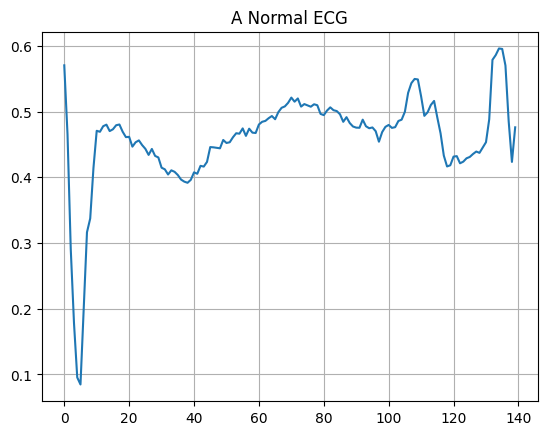

In [10]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

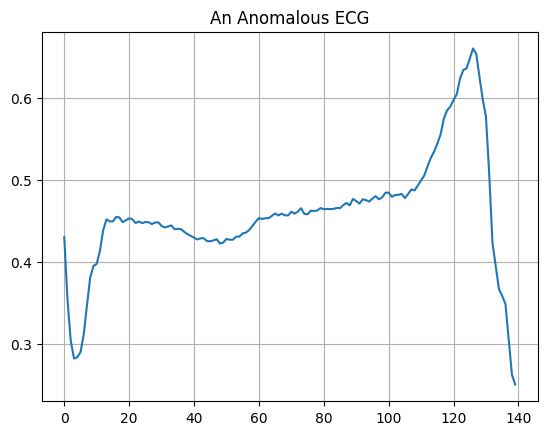

In [11]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

# Create the architecture of the autoencoder

In [12]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(64, activation="selu"),
      Dropout(0.2),
      layers.Dense(32, activation="selu"),
      Dropout(0.2),
      layers.Dense(16, activation="selu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(32, activation="selu"),
      Dropout(0.2),
      layers.Dense(64, activation="selu"),
      Dropout(0.2),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [13]:
autoencoder.compile(optimizer='adam', loss='mae')

# Train your autoencoder architecture
---

In [14]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 2s 69ms/step - loss: 0.1307 - val_loss: 0.0764
Epoch 2/20
5/5 [==============================] - 0s 17ms/step - loss: 0.1076 - val_loss: 0.0655
Epoch 3/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0884 - val_loss: 0.0534
Epoch 4/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0730 - val_loss: 0.0508
Epoch 5/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0597 - val_loss: 0.0439
Epoch 6/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0511 - val_loss: 0.0410
Epoch 7/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0459 - val_loss: 0.0384
Epoch 8/20
5/5 [==============================] - 0s 23ms/step - loss: 0.0418 - val_loss: 0.0370
Epoch 9/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0383 - val_loss: 0.0357
Epoch 10/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0360 - val_loss: 0.0344
Epoch 11/20
5/5 [============

# Plot the errors
---

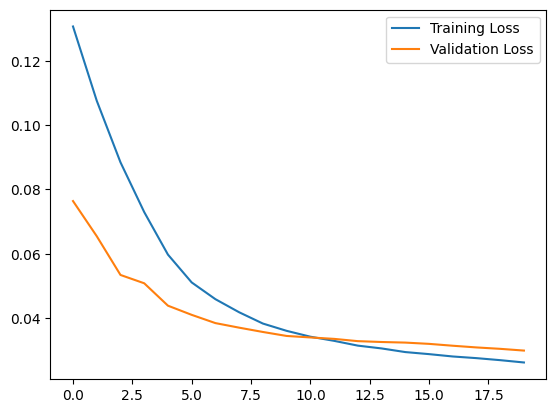

In [15]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

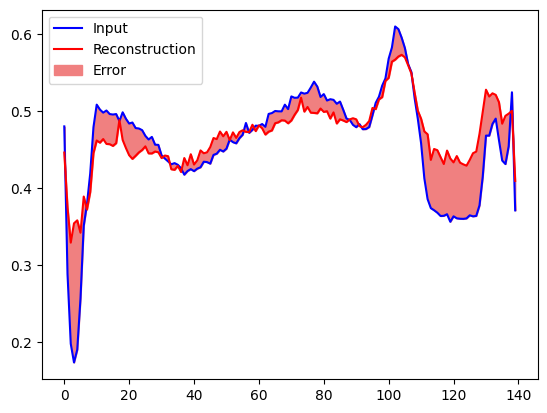

In [16]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

74/74 [==============================] - 0s 1ms/step


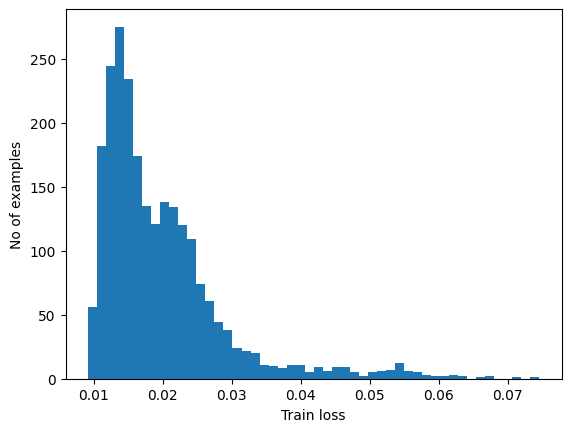

In [17]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [18]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.029025694


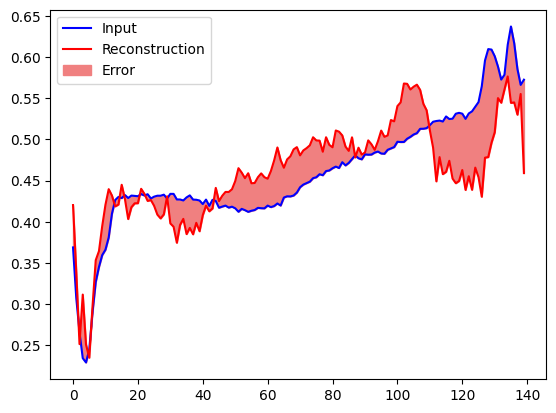

In [19]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

14/14 [==============================] - 0s 2ms/step


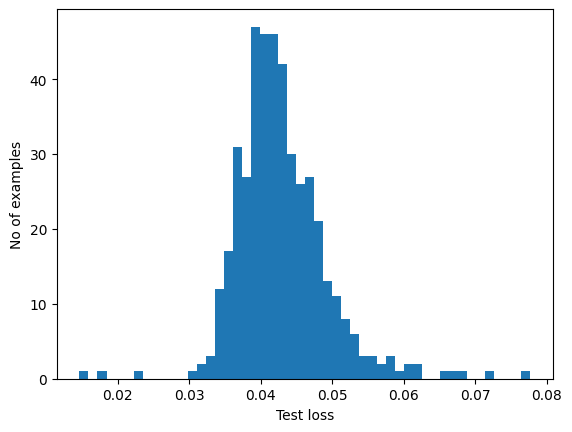

In [20]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

Classify an ECG as an anomaly if the reconstruction error is greater than the threshold.

In [21]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [22]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.94
Precision = 0.9940711462450593
Recall = 0.8982142857142857
